# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

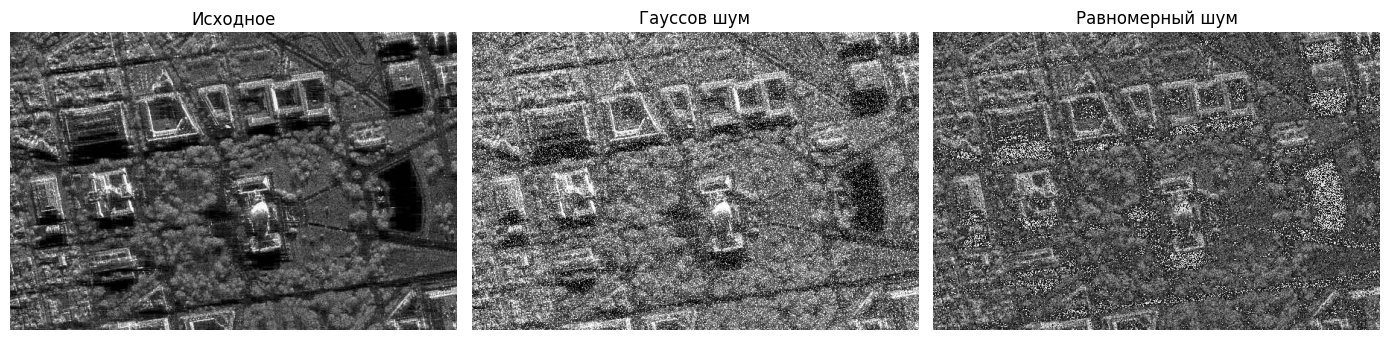

In [10]:
img = cv2.imread('sor1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mean_val = 0
std_dev = 100
g_noise = np.zeros(img_gray.shape, np.uint8)
cv2.randn(g_noise, mean_val, std_dev)
noisy_gauss = cv2.add(img_gray, g_noise)

low_val = -50
high_val = 50
u_noise = np.random.uniform(low_val, high_val, img_gray.shape).astype(np.uint8)
noisy_uniform = np.clip(img_gray.astype(np.uint8) + u_noise, 0, 255).astype(np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
axs[0].imshow(img_gray, cmap='gray'); axs[0].set_title('Исходное'); axs[0].axis('off')
axs[1].imshow(noisy_gauss, cmap='gray'); axs[1].set_title('Гауссов шум'); axs[1].axis('off')
axs[2].imshow(noisy_uniform, cmap='gray'); axs[2].set_title('Равномерный шум'); axs[2].axis('off')
plt.tight_layout()
plt.show()

In [11]:
def evaluate_filters(noisy_img, clean_img):
    filter_set = [
        ('Gauss 3x3 σ=0', cv2.GaussianBlur(noisy_img, (3, 3), 0)),
        ('Gauss 5x5 σ=0', cv2.GaussianBlur(noisy_img, (5, 5), 0)),
        ('Gauss 7x7 σ=0', cv2.GaussianBlur(noisy_img, (7, 7), 0)),
        ('Gauss 3x3 σ=1', cv2.GaussianBlur(noisy_img, (3, 3), 1)),
        ('Gauss 3x3 σ=2', cv2.GaussianBlur(noisy_img, (3, 3), 2)),
        ('Gauss 5x5 σ=1', cv2.GaussianBlur(noisy_img, (5, 5), 1)),
        ('Gauss 5x5 σ=2', cv2.GaussianBlur(noisy_img, (5, 5), 2)),
        ('Gauss 7x7 σ=1', cv2.GaussianBlur(noisy_img, (7, 7), 1)),
        ('Gauss 7x7 σ=2', cv2.GaussianBlur(noisy_img, (7, 7), 2)),

        ('Median 3x3', cv2.medianBlur(noisy_img, 3)),
        ('Median 5x5', cv2.medianBlur(noisy_img, 5)),
        ('Median 7x7', cv2.medianBlur(noisy_img, 7)),

        ('Bilat d9 σ25', cv2.bilateralFilter(noisy_img, 9, 25, 25)),
        ('Bilat d9 σ75', cv2.bilateralFilter(noisy_img, 9, 75, 75)),
        ('Bilat d15 σ100', cv2.bilateralFilter(noisy_img, 15, 100, 100)),

        ('NLM h10', cv2.fastNlMeansDenoising(noisy_img, h=10)),
        ('NLM h20', cv2.fastNlMeansDenoising(noisy_img, h=20)),
        ('NLM h30', cv2.fastNlMeansDenoising(noisy_img, h=30))
    ]

    output = {}

    for f_name, f_img in filter_set:
        m = mean_squared_error(clean_img, f_img)
        s = structural_similarity(clean_img, f_img)

        output[f_name] = {
            'image': f_img,
            'mse': m,
            'ssim': s
        }
    return output

In [12]:
def show_results(noisy_img, results_dict):
    total = len(results_dict)
    cols = 4
    rows = (total + cols) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(18, 4 * rows))
    axs = axs.flatten()

    axs[0].imshow(noisy_img, cmap='gray')
    axs[0].set_title('Зашумленное')
    axs[0].axis('off')

    for i, (f_name, res) in enumerate(results_dict.items(), 1):
        if i < len(axs):
            axs[i].imshow(res['image'], cmap='gray')
            axs[i].set_title(f'{f_name}', fontsize=9)
            axs[i].axis('off')

    for j in range(len(results_dict) + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

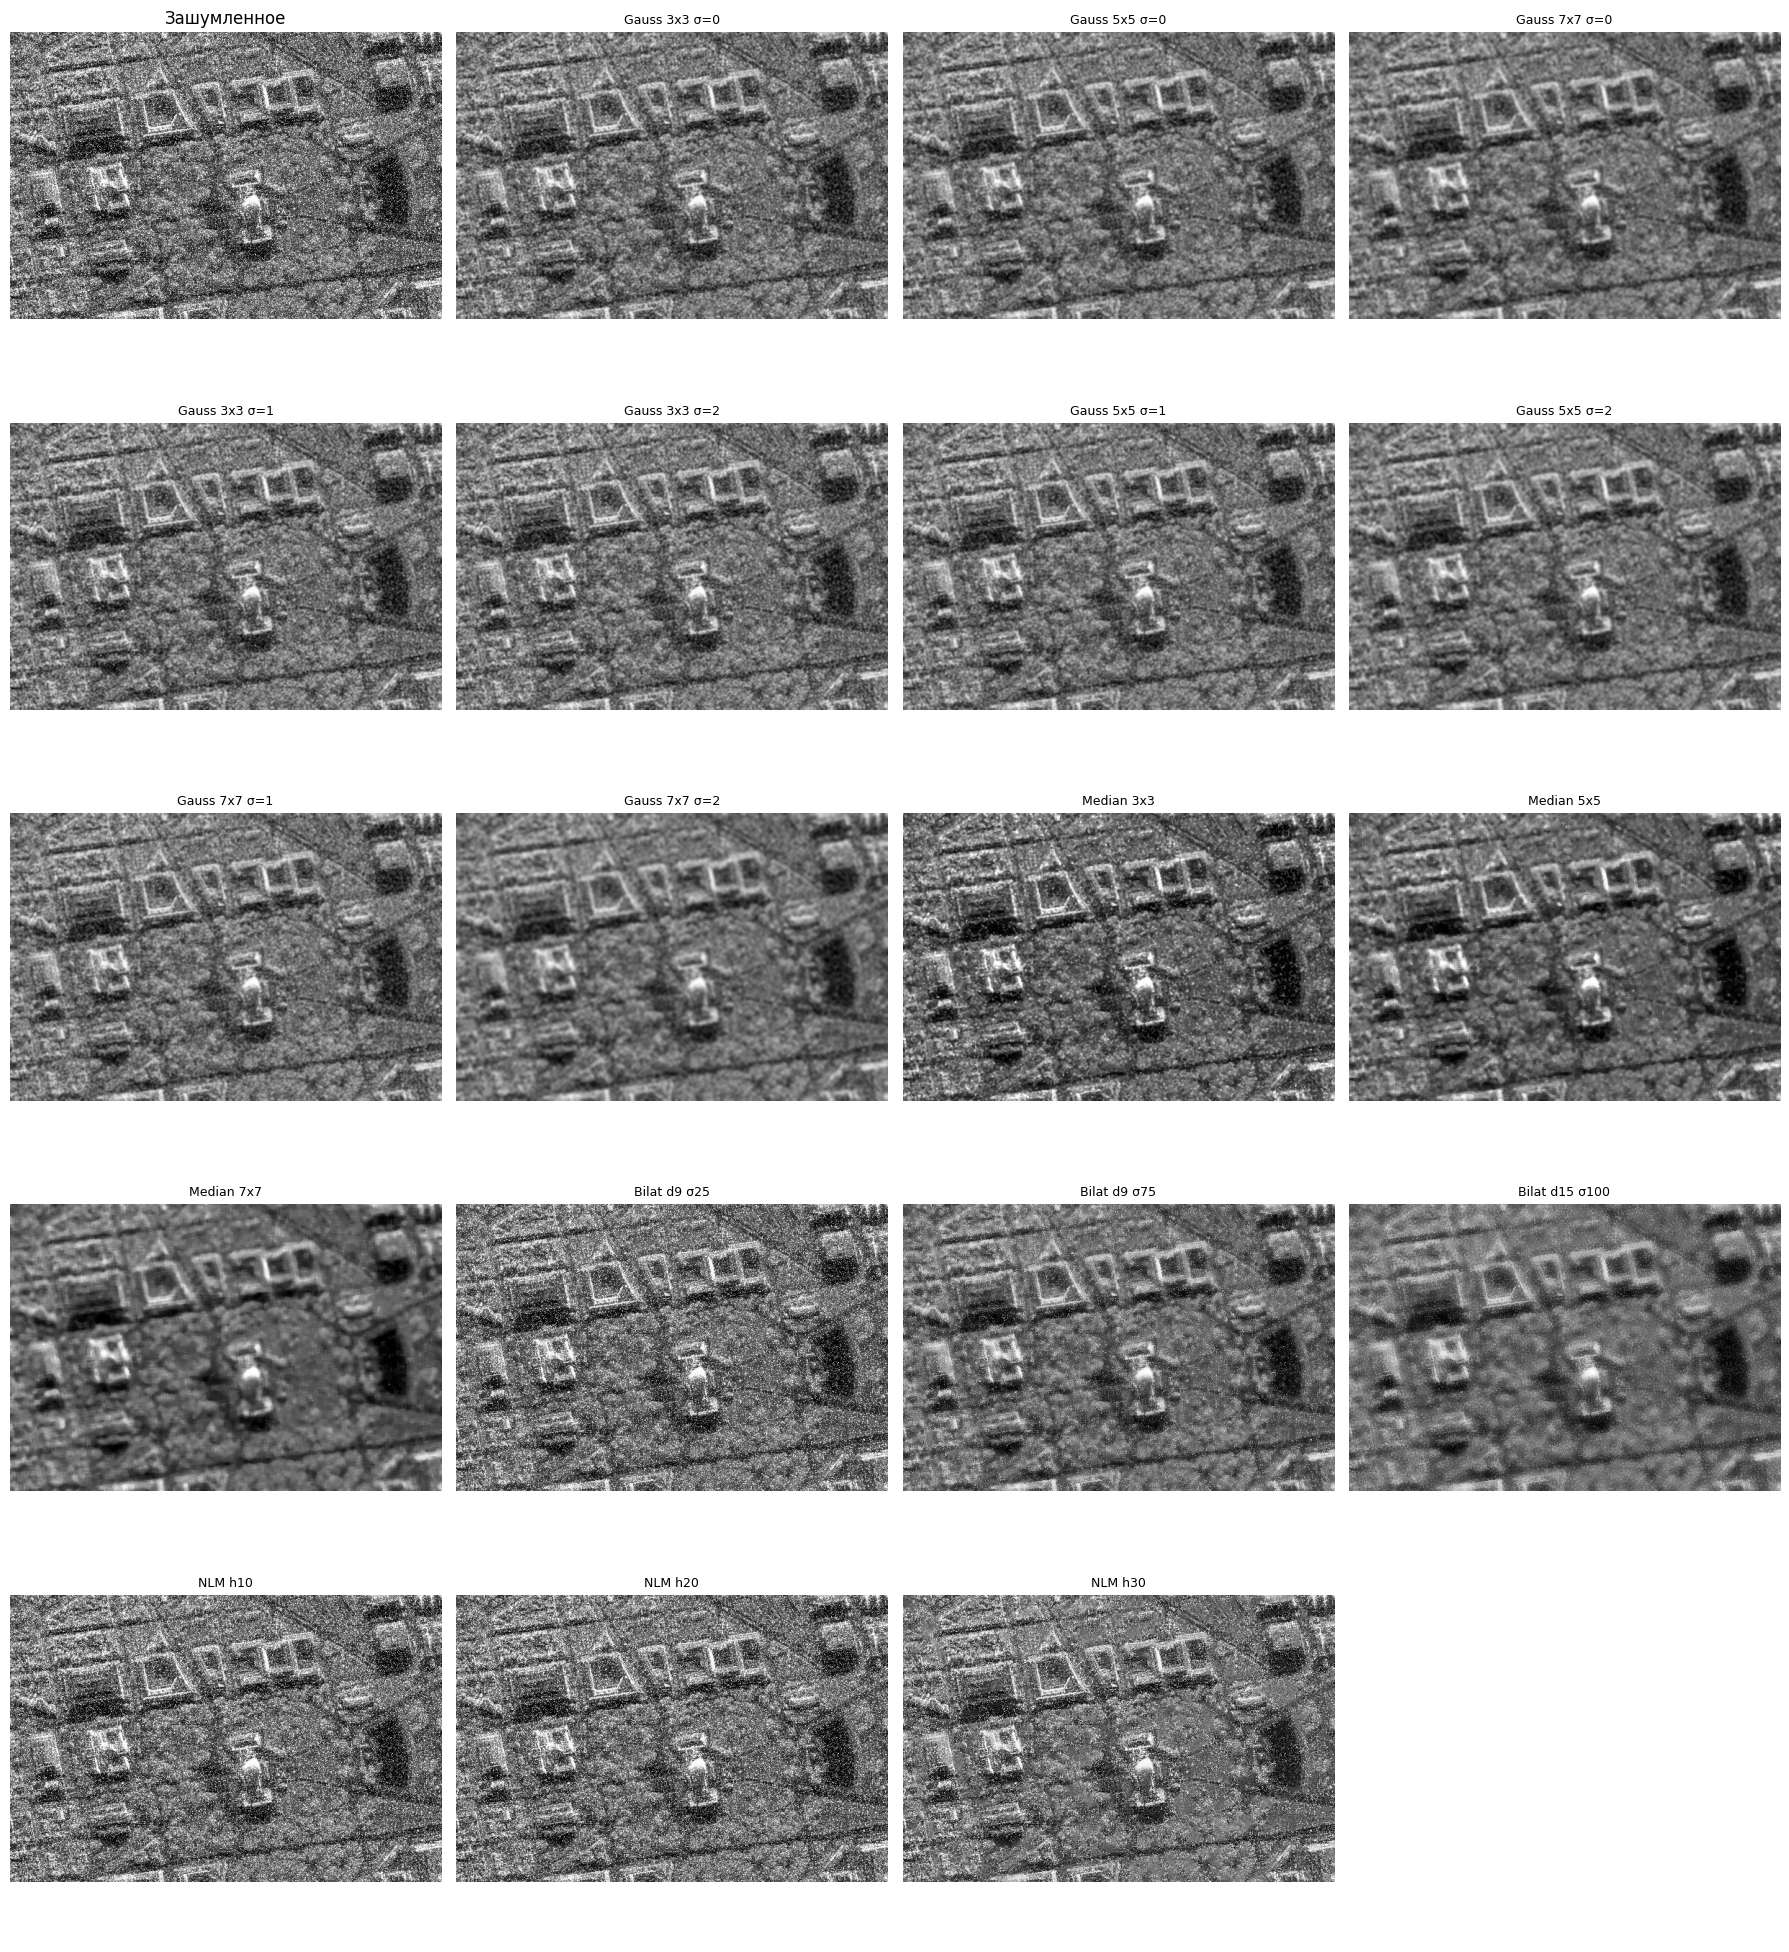

In [13]:
filter_results = evaluate_filters(noisy_gauss, img_gray)
show_results(noisy_gauss, filter_results)

In [14]:
def calc_metrics(filt_img, orig_img):
    m = mean_squared_error(orig_img, filt_img)
    s = structural_similarity(orig_img, filt_img)
    return [m, s]

In [15]:
processed_images = {
    'G 3x3 σ0': cv2.GaussianBlur(noisy_gauss, (3, 3), 0),
    'G 5x5 σ0': cv2.GaussianBlur(noisy_gauss, (5, 5), 0),
    'G 7x7 σ0': cv2.GaussianBlur(noisy_gauss, (7, 7), 0),
    'G 3x3 σ1': cv2.GaussianBlur(noisy_gauss, (3, 3), 1),
    'G 3x3 σ2': cv2.GaussianBlur(noisy_gauss, (3, 3), 2),
    'G 5x5 σ1': cv2.GaussianBlur(noisy_gauss, (5, 5), 1),
    'G 5x5 σ2': cv2.GaussianBlur(noisy_gauss, (5, 5), 2),
    'G 7x7 σ1': cv2.GaussianBlur(noisy_gauss, (7, 7), 1),
    'G 7x7 σ2': cv2.GaussianBlur(noisy_gauss, (7, 7), 2),

    'Med 3x3': cv2.medianBlur(noisy_gauss, 3),
    'Med 5x5': cv2.medianBlur(noisy_gauss, 5),
    'Med 7x7': cv2.medianBlur(noisy_gauss, 7),

    'Bil 9/25': cv2.bilateralFilter(noisy_gauss, 9, 25, 25),
    'Bil 9/75': cv2.bilateralFilter(noisy_gauss, 9, 75, 75),
    'Bil 15/100': cv2.bilateralFilter(noisy_gauss, 15, 100, 100),

    'NLM 10': cv2.fastNlMeansDenoising(noisy_gauss, h=10),
    'NLM 20': cv2.fastNlMeansDenoising(noisy_gauss, h=20),
    'NLM 30': cv2.fastNlMeansDenoising(noisy_gauss, h=30)
}

In [16]:
ranking = sorted(((name, calc_metrics(img, img_gray)) for name, img in processed_images.items()),
                 key=lambda x: x[1][1], reverse=True)

for pos, item in enumerate(ranking, 1):
    print(f'{pos}: {item[0]}, MSE: {item[1][0]:.2f}, SSIM: {item[1][1]:.4f}')

1: G 3x3 σ0, MSE: 2074.78, SSIM: 0.5066
2: G 5x5 σ1, MSE: 2003.21, SSIM: 0.5019
3: G 7x7 σ1, MSE: 2001.21, SSIM: 0.5001
4: G 3x3 σ1, MSE: 2066.84, SSIM: 0.4991
5: G 5x5 σ0, MSE: 2007.45, SSIM: 0.4924
6: Med 3x3, MSE: 1445.09, SSIM: 0.4692
7: G 3x3 σ2, MSE: 2100.81, SSIM: 0.4676
8: G 7x7 σ0, MSE: 2027.76, SSIM: 0.4456
9: G 5x5 σ2, MSE: 2063.70, SSIM: 0.4224
10: Med 5x5, MSE: 1239.30, SSIM: 0.4212
11: Bil 9/75, MSE: 2077.74, SSIM: 0.4131
12: G 7x7 σ2, MSE: 2083.33, SSIM: 0.3909
13: Bil 15/100, MSE: 1914.13, SSIM: 0.3890
14: NLM 30, MSE: 3456.18, SSIM: 0.3549
15: Med 7x7, MSE: 1275.26, SSIM: 0.3486
16: NLM 20, MSE: 4208.77, SSIM: 0.3188
17: NLM 10, MSE: 4209.30, SSIM: 0.3188
18: Bil 9/25, MSE: 3808.09, SSIM: 0.3154


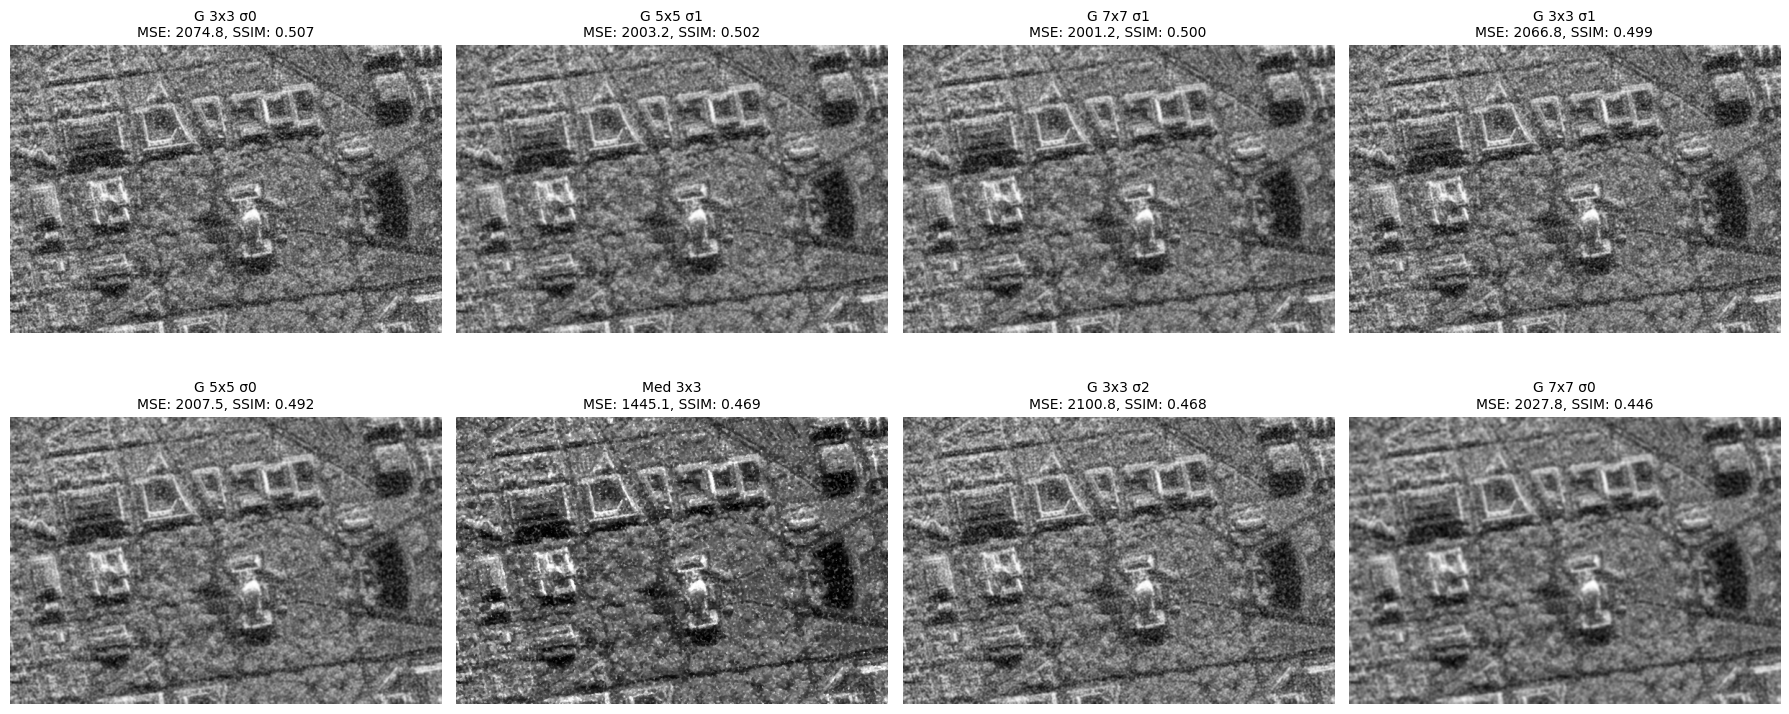

In [17]:
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
for idx, (f_name, vals) in enumerate(ranking[:8]):
    r, c = idx // 4, idx % 4
    axs[r, c].imshow(processed_images[f_name], cmap='gray')
    axs[r, c].set_title(f'{f_name}\nMSE: {vals[0]:.1f}, SSIM: {vals[1]:.3f}', fontsize=10)
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

In [18]:
best_by_mse = min(ranking, key=lambda x: x[1][0])
best_by_ssim = max(ranking, key=lambda x: x[1][1])

print(f"Наименьшая MSE: {best_by_mse[0]} ({best_by_mse[1][0]:.2f})")
print(f"Наибольшая SSIM: {best_by_ssim[0]} ({best_by_ssim[1][1]:.4f})")

Наименьшая MSE: Med 5x5 (1239.30)
Наибольшая SSIM: G 3x3 σ0 (0.5066)
